<a href="https://colab.research.google.com/github/naga8199/CMPE257-Fall23-NagaLakshmi-Nagubandi/blob/class-activities/ClassActivity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# Generates N random points for linear regression on a line y = w0 + w1*x
def generate_lr(N=20, w0=0, w1=1):
    X1 = []
    Y = []
    for _ in range(N):
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-1, 1)
        y = w0 + w1 * x1 + x2
        X1.append(x1)
        Y.append(y)
    data = np.array([[1, X1[i], Y[i]] for i in range(N)])
    return data


In [ ]:
# Function to calculate the hypothesis for linear model with regularization
def compute_hypothesis(X, theta):
    return np.dot(X, theta)

In [ ]:
# Function to calculate the cost with regularization
def compute_cost(X, y, theta, lambd):
    m = len(y)
    h = compute_hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2) + (lambd / (2 * m)) * np.sum(theta[1:] ** 2)
    return cost

In [ ]:
# Function to do gradient descent with regularization
def gradient_descent(X, y, theta, alpha, lambd, num_iters):
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        h = compute_hypothesis(X, theta)
        gradient = (1 / m) * np.dot(X.T, h - y) + (lambd / m) * np.concatenate(([0], theta[1:]))
        theta -= alpha * gradient
        J_history.append(compute_cost(X, y, theta, lambd))

    return theta, J_history

In [ ]:
# Define the true parameters for the linear model
f_w0 = 1
f_w1 = 1


In [ ]:
# Generate the data
N = 50
data = generate_lr(N, w0=f_w0, w1=f_w1)

In [ ]:
# Extract features X and target values Y
X = data[:, :2]
Y = data[:, 2]

In [ ]:
# Define the lambdas
lambdas = [0, 0.001, 0.1, 1]

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
best_lambda = None
best_rmse = float("inf")

In [ ]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label=f"x_2={slope:.2f}x_1+{intercept:.2f}", c=color)

Lambda: 0, Average RMSE: 0.5096425972036308


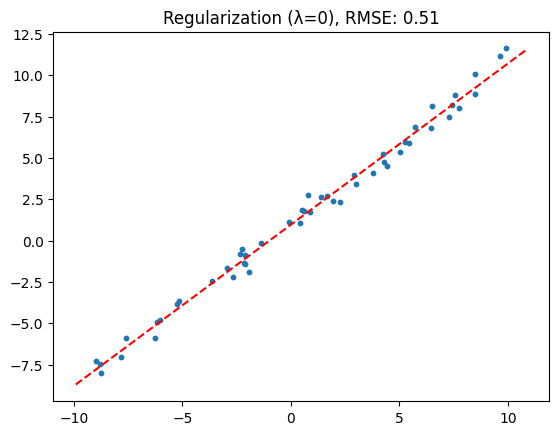

Lambda: 0.001, Average RMSE: 0.5096427890140646


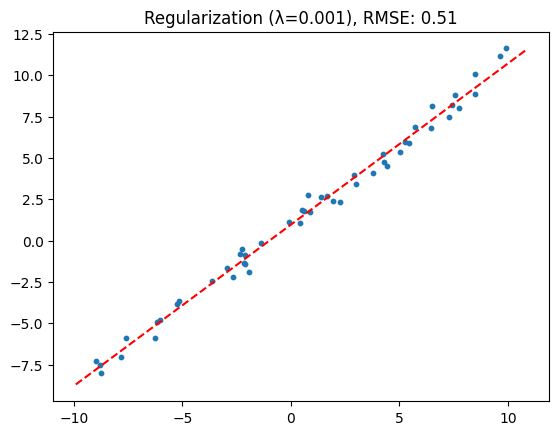

Lambda: 0.1, Average RMSE: 0.5096619758249918


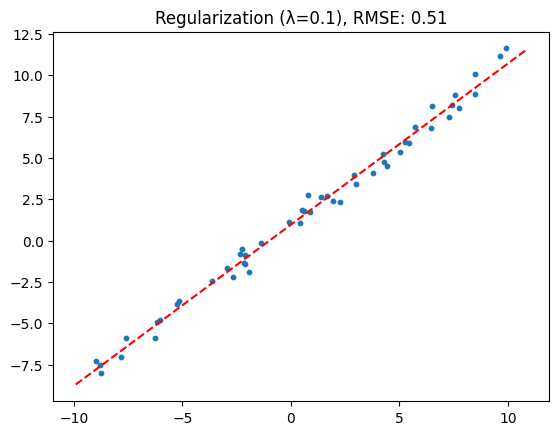

Lambda: 1, Average RMSE: 0.5098542882221768


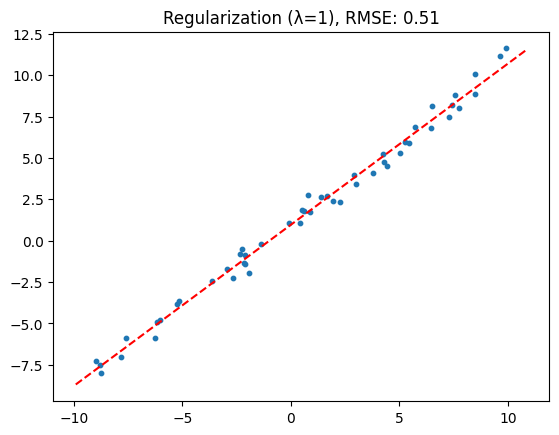

Best Lambda: 0, Best Average RMSE: 0.5096425972036308


In [ ]:
for lambd in lambdas:
    rmse_values = []

    # Initialize KFold with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        # Initialize parameters
        theta = np.zeros(2)  # Initialize with zeros

        # Set the learning rate as 0.01 and number of iterations as 1000
        alpha = 0.01
        num_iters = 1000

        # Perform gradient descent
        theta, _ = gradient_descent(X_train, Y_train, theta, alpha, lambd, num_iters)

        # Make predictions on the test set
        Y_pred = compute_hypothesis(X_test, theta)

        # Calculate Root Mean Squared Error
        rmse = sqrt(mean_squared_error(Y_test, Y_pred))
        rmse_values.append(rmse)

    # Calculate the average RMSE for all lambdas
    avg_rmse = np.mean(rmse_values)

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_lambda = lambd

    print(f"Lambda: {lambd}, Average RMSE: {avg_rmse}")

    # Plot the final hypothesis
    plt.scatter(X[:, 1], Y, s=10)

    # Plot the learned line with regularization for every lambda
    abline(theta[1], theta[0], color='r')
    plt.title(f'Regularization (λ={lambd}), RMSE: {avg_rmse:.2f}')
    plt.show()

print(f"Best Lambda: {best_lambda}, Best Average RMSE: {best_rmse}")